# ML Project: Sentiment Analysis using Machine Learning
- **Nama:** Ananta Boemi Adji
- **Email:** ananta.adji3007@gmail.com
- **ID Dicoding:** nanta_adji

# **Analisis Sentimen Review Tokopedia**  

Dalam industri e-commerce, ulasan pengguna memainkan peran penting dalam membentuk reputasi produk dan penjual. Project saya ini bertujuan untuk menganalisis sentimen ulasan di Tokopedia guna memahami persepsi pelanggan terhadap produk dan layanan yang ditawarkan.  

Dengan menggunakan teknik pemrosesan bahasa alami (NLP) dan machine learning, proyek ini akan mengklasifikasikan ulasan sebagai sentimen positif atau negatif. Hasil analisis ini dapat membantu penjual dalam meningkatkan kualitas produk serta memberikan wawasan bagi calon pembeli sebelum melakukan transaksi.  

Pada project ini saya akan menggunakan Python serta pustaka populer seperti NLTK, scikit-learn, dan TensorFlow.

# **Import Library**

In [ ]:
pip freeze requirements.txt

In [61]:
# Standard Libraries
import csv
import datetime as dt
import re
import string
from io import StringIO

# Data Handling & Computation
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # Disable chained assignment warning

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing (NLP)
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Bahasa Indonesia NLP Tools
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Text Visualization
from wordcloud import WordCloud

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing & Evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Pipeline
from sklearn.pipeline import Pipeline

# Pengaturan Seed
seed = 0
np.random.seed(seed)

In [2]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Loading Dataset

In [5]:
# Membaca dataset dari file CSV yang sudah disimpan
app_reviews_df = pd.read_csv('ulasan_aplikasi.csv')

# Menghitung jumlah baris dan kolom
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

# Menampilkan informasi dasar
print(f"Jumlah ulasan: {jumlah_ulasan}")
print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah ulasan: 180000
Jumlah kolom: 11


In [6]:
# import os

# if os.path.exists('ulasan_aplikasi.csv'):
#     app_reviews_df = pd.read_csv('ulasan_aplikasi.csv')
#     print("Dataset berhasil dibaca.")
# else:
#     print("File dataset tidak ditemukan.")

In [7]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.describe()

,score,thumbsUpCount
count,180000.000000,180000.000000
mean,3.640950,3.706056
std,1.746092,52.879961
min,1.000000,0.000000
25%,1.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,9915.000000


Seperti yang dilihat, data awal dari dataset yang didapatkan hanya baru memiliki jumlah 1 kolom saja yaitu review.

In [9]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.read_csv('ulasan_aplikasi.csv')

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

print(f"Jumlah ulasan: {jumlah_ulasan}")
print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah ulasan: 180000
Jumlah kolom: 11


In [10]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c4d64638-5f79-470d-a6d7-3510c5b44648,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi Payah.. Baru Pertama Pakai Tokopedia ...,2,44,3.305.0,2025-04-07 02:55:19,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-07 03:27:03,3.305.0
1,348365cb-b113-448b-bdc0-fedb6e9e7595,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya sangat bagus, namun aku kasih bint...",3,13,3.305.0,2025-04-09 11:28:39,"Terima kasih atas rating yang kamu berikan, To...",2025-04-09 11:47:01,3.305.0
2,9faf326c-e252-468c-b283-19ea0bac9f3c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Setelah di beli tiktok, tokopedia jadi ancur, ...",1,49,3.305.0,2025-04-04 18:13:01,"Halo Toppers, terima kasih atas rating yang ka...",2025-04-04 18:47:03,3.305.0
3,535c5471-1574-4053-a7a4-79ab27ae6f57,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Salah satu aplikasi yang untuk hobi barangnya ...,4,12,3.305.0,2025-04-09 05:41:59,"Toppers, terima kasih atas rating yang kamu be...",2025-04-09 06:07:01,3.305.0
4,c8ab50e4-aca7-4498-9ccd-07d7fc5481cf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"bintang satu gan, hati2 transaksi di aplikasi ...",1,9,3.305.0,2025-04-11 03:01:49,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-11 03:27:05,3.305.0


Sekarang jumlah kolom dataset sudah lebih lengkap dan terjabarkan dengan lebih jelas sehingga bisa untuk digunakan untuk proses selanjutnya.

In [11]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              180000 non-null  object
 1   userName              180000 non-null  object
 2   userImage             180000 non-null  object
 3   content               180000 non-null  object
 4   score                 180000 non-null  int64 
 5   thumbsUpCount         180000 non-null  int64 
 6   reviewCreatedVersion  125241 non-null  object
 7   at                    180000 non-null  object
 8   replyContent          87891 non-null   object
 9   repliedAt             87891 non-null   object
 10  appVersion            125241 non-null  object
dtypes: int64(2), object(9)
memory usage: 15.1+ MB


In [12]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              180000 non-null  object
 1   userName              180000 non-null  object
 2   userImage             180000 non-null  object
 3   content               180000 non-null  object
 4   score                 180000 non-null  int64 
 5   thumbsUpCount         180000 non-null  int64 
 6   reviewCreatedVersion  125241 non-null  object
 7   at                    180000 non-null  object
 8   replyContent          87891 non-null   object
 9   repliedAt             87891 non-null   object
 10  appVersion            125241 non-null  object
dtypes: int64(2), object(9)
memory usage: 15.1+ MB


In [13]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [14]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67284 entries, 0 to 179996
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              67284 non-null  object
 1   userName              67284 non-null  object
 2   userImage             67284 non-null  object
 3   content               67284 non-null  object
 4   score                 67284 non-null  int64 
 5   thumbsUpCount         67284 non-null  int64 
 6   reviewCreatedVersion  67284 non-null  object
 7   at                    67284 non-null  object
 8   replyContent          67284 non-null  object
 9   repliedAt             67284 non-null  object
 10  appVersion            67284 non-null  object
dtypes: int64(2), object(9)
memory usage: 6.2+ MB


In [15]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

##Preprocessing

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [16]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [17]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

Kamus slang atau daftar kata-kata slang yang Anda berikan adalah kumpulan kata-kata slang bahasa Indonesia beserta terjemahan atau artinya dalam bahasa formal. Fungsi dari kamus slang seperti ini adalah:

1. **Mengartikan Slang:** Kamus slang membantu orang yang mungkin tidak familiar dengan bahasa slang atau ekspresi yang digunakan di kalangan tertentu untuk memahami makna kata-kata tersebut.

2. **Komunikasi Informal:** Slang sering digunakan dalam percakapan informal atau di media sosial. Kamus slang membantu orang untuk berkomunikasi dengan gaya yang lebih santai dan sesuai dengan konteksnya.

3. **Pemahaman Budaya Pop:** Slang sering kali terkait dengan budaya pop dan dapat mencerminkan tren dan perubahan dalam bahasa. Kamus slang memungkinkan orang untuk mengikuti dan memahami bahasa dalam konteks budaya ini.

4. **Penggunaan Sastra dan Penulisan:** Penulis atau pembicara mungkin ingin menggunakan slang dalam tulisannya untuk menciptakan efek tertentu atau mengekspresikan karakter atau setting yang lebih realistis. Kamus slang dapat membantu mereka memilih kata-kata dengan tepat.

5. **Hiburan dan Curiositas:** Beberapa orang mungkin tertarik untuk mempelajari bahasa slang hanya untuk hiburan atau karena rasa ingin tahu terhadap variasi bahasa dan ungkapan dalam bahasa sehari-hari.

Ingatlah bahwa penggunaan slang harus disesuaikan dengan konteks dan audiens. Slang cenderung lebih cocok untuk percakapan santai dengan teman-teman atau di lingkungan yang informal. Dalam situasi formal, penggunaan bahasa formal lebih sesuai.

In [18]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c4d64638-5f79-470d-a6d7-3510c5b44648,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi Payah.. Baru Pertama Pakai Tokopedia ...,2,44,3.305.0,2025-04-07 02:55:19,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-07 03:27:03,3.305.0
1,348365cb-b113-448b-bdc0-fedb6e9e7595,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya sangat bagus, namun aku kasih bint...",3,13,3.305.0,2025-04-09 11:28:39,"Terima kasih atas rating yang kamu berikan, To...",2025-04-09 11:47:01,3.305.0
2,9faf326c-e252-468c-b283-19ea0bac9f3c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Setelah di beli tiktok, tokopedia jadi ancur, ...",1,49,3.305.0,2025-04-04 18:13:01,"Halo Toppers, terima kasih atas rating yang ka...",2025-04-04 18:47:03,3.305.0
3,535c5471-1574-4053-a7a4-79ab27ae6f57,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Salah satu aplikasi yang untuk hobi barangnya ...,4,12,3.305.0,2025-04-09 05:41:59,"Toppers, terima kasih atas rating yang kamu be...",2025-04-09 06:07:01,3.305.0
4,c8ab50e4-aca7-4498-9ccd-07d7fc5481cf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"bintang satu gan, hati2 transaksi di aplikasi ...",1,9,3.305.0,2025-04-11 03:01:49,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-11 03:27:05,3.305.0
...,...,...,...,...,...,...,...,...,...,...,...
179992,69575271-8dcb-48b8-814f-bf4a7116fd0b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ga bisa liat produk, search produk. Mati total",5,0,3.22.1,2019-03-26 06:02:08,"Hi Aris, \n\nMohon maaf atas ketidaknyamananny...",2016-08-11 08:35:52,3.22.1
179993,cc501368-9b27-4f55-a1e9-91b43545dbb4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,banyakin promonya . dari pada buat bayar boyba...,5,0,3.98,2021-12-28 02:53:40,"Hai Toppers, Terima kasih untuk rating yang te...",2021-12-28 03:10:08,3.98
179994,e782389d-00a7-4f8a-93de-4d73f0113a8e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,transaksi yg mudah cepat dan aman,4,0,3.103,2020-12-10 12:08:49,"Hai Kak Bagus, makasih ya atas rating dan revi...",2020-12-10 12:38:58,3.103
179995,b4edeaa9-47f2-4de8-ae3d-b05d921e2a42,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus dan lancar pesan apapun,5,0,3.186,2022-09-16 10:19:38,"Hai Toppers, Terima kasih untuk rating yang te...",2022-09-16 10:32:19,3.186


In [19]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

import nltk
nltk.download('punkt_tab')
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [20]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,c4d64638-5f79-470d-a6d7-3510c5b44648,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi Payah.. Baru Pertama Pakai Tokopedia ...,2,44,3.305.0,2025-04-07 02:55:19,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-07 03:27:03,3.305.0,Aplikasi Payah Baru Pertama Pakai Tokopedia te...,aplikasi payah baru pertama pakai tokopedia te...,aplikasi payah baru pertama pakai tokopedia te...,"[aplikasi, payah, baru, pertama, pakai, tokope...","[aplikasi, payah, pakai, tokopedia, pengiriman...",aplikasi payah pakai tokopedia pengiriman co t...
1,348365cb-b113-448b-bdc0-fedb6e9e7595,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya sangat bagus, namun aku kasih bint...",3,13,3.305.0,2025-04-09 11:28:39,"Terima kasih atas rating yang kamu berikan, To...",2025-04-09 11:47:01,3.305.0,Aplikasinya sangat bagus namun aku kasih binta...,aplikasinya sangat bagus namun aku kasih binta...,aplikasinya sangat bagus namun aku kasih binta...,"[aplikasinya, sangat, bagus, namun, aku, kasih...","[aplikasinya, bagus, kasih, bintang, bug, mene...",aplikasinya bagus kasih bintang bug menerima p...
2,9faf326c-e252-468c-b283-19ea0bac9f3c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Setelah di beli tiktok, tokopedia jadi ancur, ...",1,49,3.305.0,2025-04-04 18:13:01,"Halo Toppers, terima kasih atas rating yang ka...",2025-04-04 18:47:03,3.305.0,Setelah di beli tiktok tokopedia jadi ancur pa...,setelah di beli tiktok tokopedia jadi ancur pa...,setelah di beli tiktok tokopedia jadi hancur p...,"[setelah, di, beli, tiktok, tokopedia, jadi, h...","[beli, tiktok, tokopedia, hancur, pantes, toko...",beli tiktok tokopedia hancur pantes toko sepi ...
3,535c5471-1574-4053-a7a4-79ab27ae6f57,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Salah satu aplikasi yang untuk hobi barangnya ...,4,12,3.305.0,2025-04-09 05:41:59,"Toppers, terima kasih atas rating yang kamu be...",2025-04-09 06:07:01,3.305.0,Salah satu aplikasi yang untuk hobi barangnya ...,salah satu aplikasi yang untuk hobi barangnya ...,salah satu aplikasi yang untuk hobi barangnya ...,"[salah, satu, aplikasi, yang, untuk, hobi, bar...","[salah, aplikasi, hobi, barangnya, lengkap, ba...",salah aplikasi hobi barangnya lengkap banget m...
4,c8ab50e4-aca7-4498-9ccd-07d7fc5481cf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"bintang satu gan, hati2 transaksi di aplikasi ...",1,9,3.305.0,2025-04-11 03:01:49,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-04-11 03:27:05,3.305.0,bintang satu gan hati transaksi di aplikasi in...,bintang satu gan hati transaksi di aplikasi in...,bintang satu juragan hati transaksi di aplikas...,"[bintang, satu, juragan, hati, transaksi, di, ...","[bintang, juragan, hati, transaksi, aplikasi, ...",bintang juragan hati transaksi aplikasi virtua...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179992,69575271-8dcb-48b8-814f-bf4a7116fd0b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ga bisa liat produk, search produk. Mati total",5,0,3.22.1,2019-03-26 06:02:08,"Hi Aris, \n\nMohon maaf atas ketidaknyamananny...",2016-08-11 08:35:52,3.22.1,Ga bisa liat produk search produk Mati total,ga bisa liat produk search produk mati total,ga bisa lihat produk search produk mati total,"[ga, bisa, lihat, produk, search, produk, mati...","[lihat, produk, search, produk, mati, total]",lihat produk search produk mati total
179993,cc501368-9b27-4f55-a1e9-91b43545dbb4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,banyakin promonya . dari pada buat bayar boyba...,5,0,3.98,2021-12-28 02:53:40,"Hai Toppers, Terima kasih untuk rating yang te...",2021-12-28 03:10:08,3.98,banyakin promonya dari pada buat bayar boyban..

##Pelabelan

In [21]:
# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [22]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [23]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    37130
negative    30154
Name: count, dtype: int64


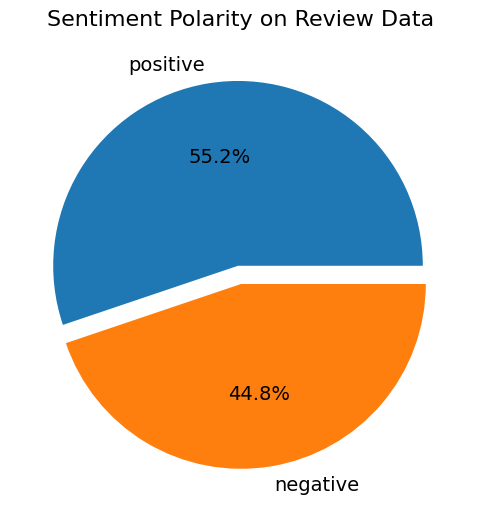

In [24]:
# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [25]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [26]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

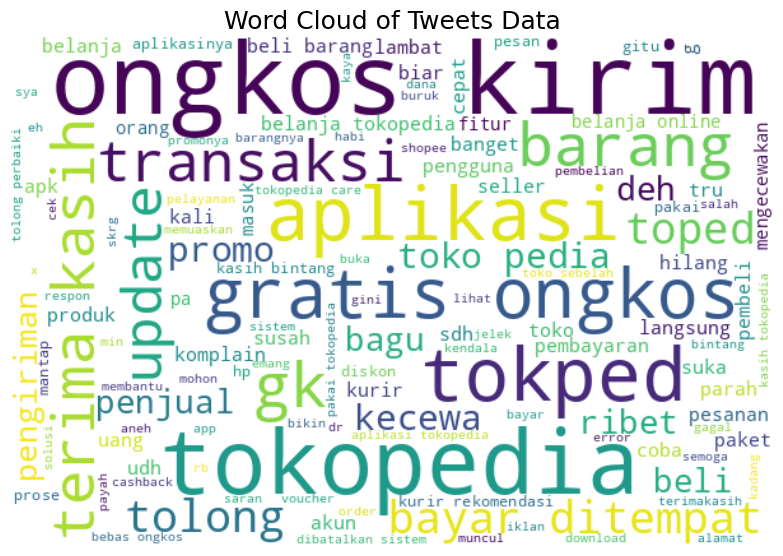

In [27]:
# CODE 1: Semua data review
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = []

# Ambil sample sebanyak 67000 dari 189000 dataset
sample_df = clean_df.sample(n=67000, random_state=42)

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in sample_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    list_words.extend(tweet)

# Gabungkan list kata menjadi satu string
list_words = ' '.join(list_words)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow(wordcloud, interpolation='bilinear')

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

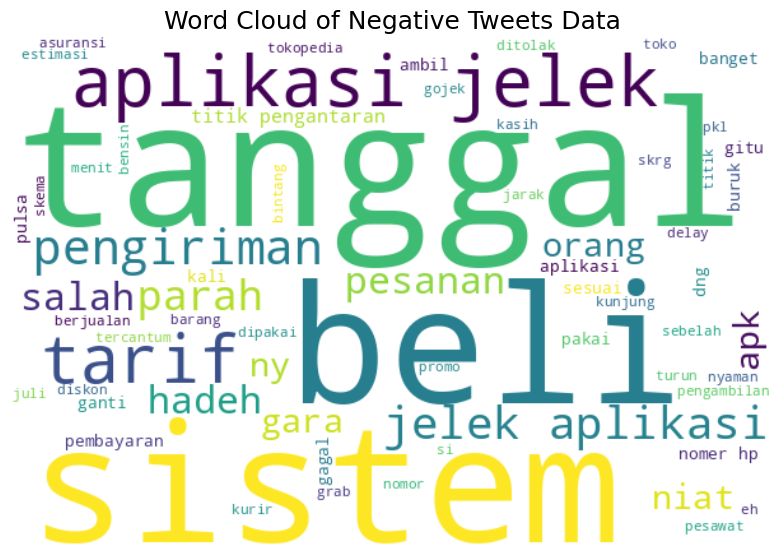

In [28]:
# CODE 2: Review Negatif
list_words = []

# Pastikan jumlah maksimal 20000 atau sesuai jumlah tersedia
available_data = len(negative_tweets)
sample_df = negative_tweets.sample(n=min(40000, available_data), random_state=42)

for tweet in sample_df['text_stopword']:
    list_words.extend(tweet)

list_words = ' '.join(list_words)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud, interpolation='bilinear')
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

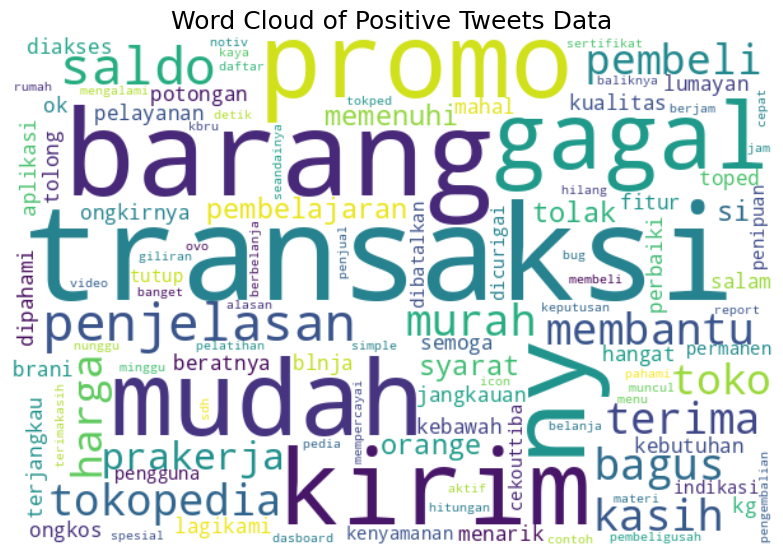

In [29]:
# CODE 3: Review Positif
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = []

# Ambil sample sebanyak 20000 dari review positif
sample_df = positive_tweets.sample(n=min(40000, available_data), random_state=42)

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in sample_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    list_words.extend(tweet)

# Gabungkan list kata menjadi satu string
list_words = ' '.join(list_words)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow(wordcloud, interpolation='bilinear')

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

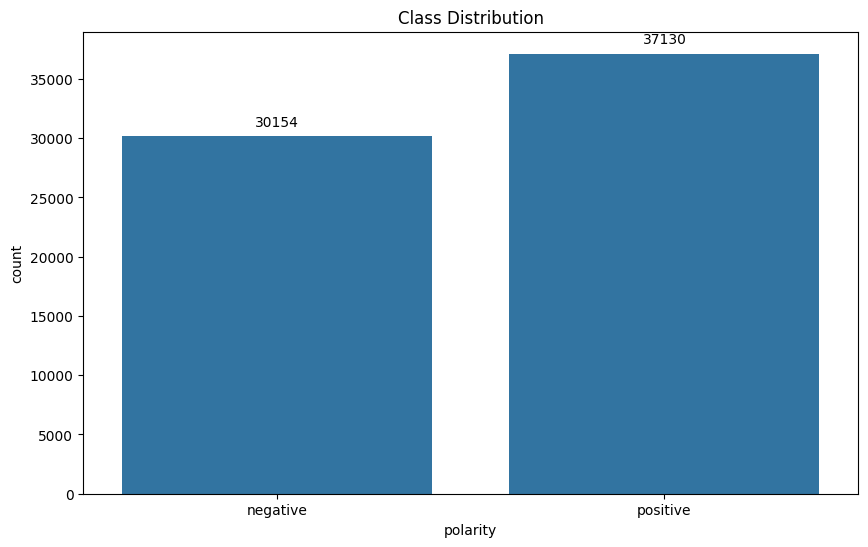

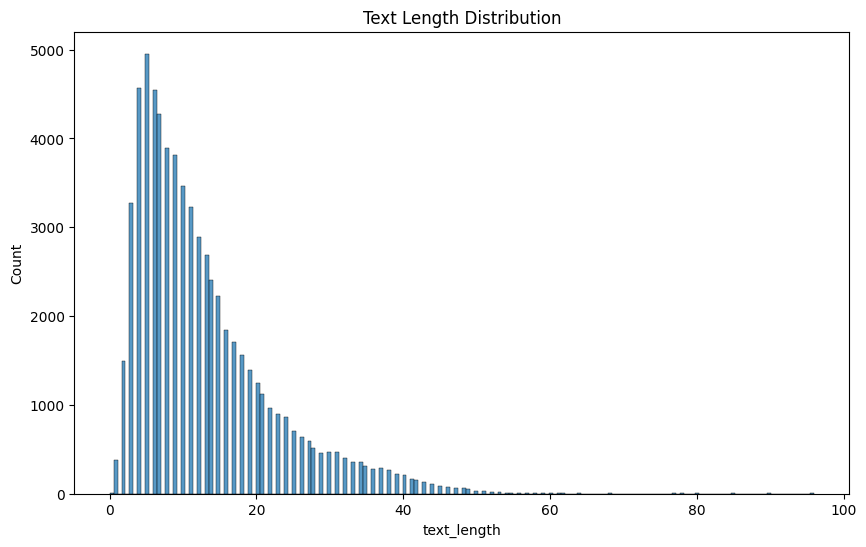

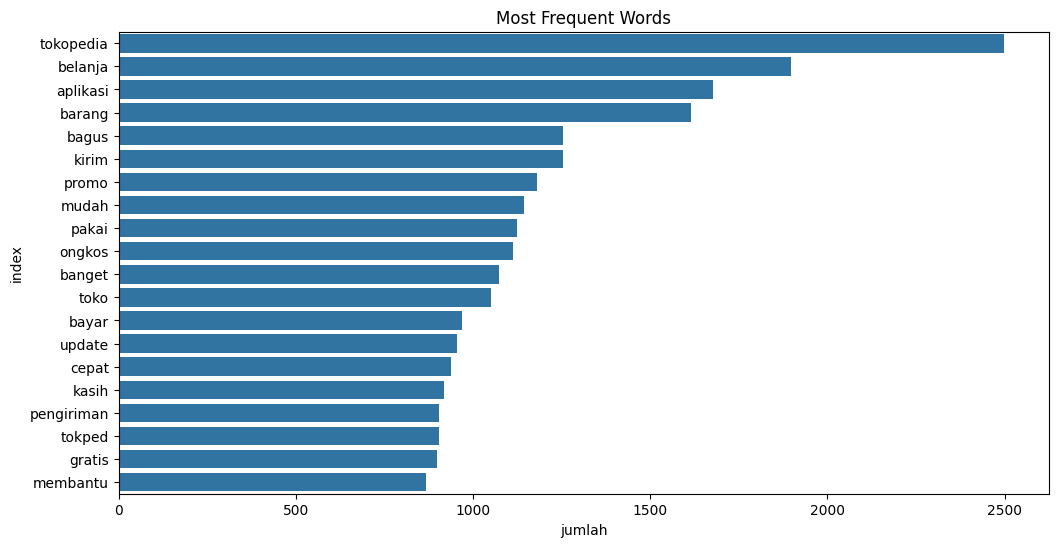

In [33]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

## **Data Splitting**

In [35]:
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,c4d64638-5f79-470d-a6d7-3510c5b44648,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi Payah.. Baru Pertama Pakai Tokopedia ternyata bener pengiriman lama.. Co tgl 5, Sekarang tgl 7 masih belum diserahkan ke pihak expedisi (masih di seller)🤦‍♂️ kalo masalah harga, memang ada beberapa seller yg harganya miring (murah) sy akuin itu. kalo masalah pengiriman, Oyen yg paling bagus (Tiada Duanya)",2,44,3.305.0,2025-04-07 02:55:19,"Hi Toppers, silakan sampaikan kritik/saran atau kendala transaksi kamu dengan menghubungi Tokopedia Care melalui tkp.me/supportMainapps agar bisa kami bantu cek lebih lanjut. Kami akan terus berupaya untuk meningkatkan pengalaman Toppers dalam bertransaksi di Tokopedia.",2025-04-07 03:27:03,3.305.0,Aplikasi Payah Baru Pertama Pakai Tokopedia ternyata bener pengiriman lama Co tgl Sekarang tgl masih belum diserahkan ke pihak expedisi masih di seller kalo masalah harga memang ada beberapa seller yg harganya miring murah sy akuin itu kalo masalah pengiriman Oyen yg paling bagus Tiada Duanya,aplikasi payah baru pertama pakai tokopedia ternyata bener pengiriman lama co tgl sekarang tgl masih belum diserahkan ke pihak expedisi masih di seller kalo masalah harga memang ada beberapa seller yg harganya miring murah sy akuin itu kalo masalah pengiriman oyen yg paling bagus tiada duanya,aplikasi payah baru pertama pakai tokopedia ternyata benar pengiriman lama co tanggal sekarang tanggal masih belum diserahkan ke pihak expedisi masih di seller kalau masalah harga memang ada beberapa seller yang harganya miring murah saya akuin itu kalau masalah pengiriman oyen yang paling bagus tiada duanya,"[aplikasi, payah, baru, pertama, pakai, tokopedia, ternyata, benar, pengiriman, lama, co, tanggal, sekarang, tanggal, masih, belum, diserahkan, ke, pihak, expedisi, masih, di, seller, kalau, masalah, harga, memang, ada, beberapa, seller, yang, harganya, miring, murah, saya, akuin, itu, kalau, masalah, pengiriman, oyen, yang, paling, bagus, tiada, duanya]","[aplikasi, payah, pakai, tokopedia, pengiriman, co, tanggal, tanggal, diserahkan, expedisi, seller, harga, seller, harganya, miring, murah, akuin, pengiriman, oyen, bagus, tiada, duanya]",aplikasi payah pakai tokopedia pengiriman co tanggal tanggal diserahkan expedisi seller harga seller harganya miring murah akuin pengiriman oyen bagus tiada duanya,-28,negative,22
1,348365cb-b113-448b-bdc0-fedb6e9e7595,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasinya sangat bagus, namun aku kasih bintang 3 dulu karena selalu terjadi ada-nya bug saat sudah menerima paketnya yaitu saat mengulas dan komplain. Pada saat mengulas, semua berjalan dengan baik dan bisa dikirim, namun sesudah itu, adanya error sehingga terjadi harus mengulas lagi padahal sebenarnya sudah. Pada saat komplain, adanya bug/error untuk memasukkan foto/video sehingga itu dapat menggangu aku kalau misalkan untuk kasih bukti komplain barang yang tidak sesuai. Tolong dipahami ya.",3,13,3.305.0,2025-04-09 11:28:39,"Terima kasih atas rating yang kamu berikan, Toppers. Besar harapan kami, kamu bisa memberikan rating yang lebih baik lagi.Oleh karena itu, jika kamu memiliki kritik/saran atau kendala transaksi, silakan hubungi Tokopedia Care di tkp.me/supportMainapps ya.",2025-04-09 11:47:01,3.305.0,Aplikasinya sangat bagus namun aku kasih bintang dulu karena selalu terjadi adanya bug saat sudah menerima paketnya yaitu saat mengulas dan komplain Pada saat mengulas semua berjalan dengan baik dan bisa dikirim namun sesudah itu adanya error sehingga terjadi harus mengulas lagi padahal sebenarnya sudah 

In [36]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [37]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [38]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,admin,akun,alamat,alasan,aman,aneh,apk,aplikasi,aplikasinya,app,...,top,toped,transaksi,trus,uang,udh,ulasan,update,verifikasi,voucher
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.152272,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.236751,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.241924,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.132102,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.281922,0.000000,0.0,0.0,0.157224,0.000000,0.0,...,0.0,0.0,0.209491,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67279,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
67280,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
67281,0.0,0.0,0.0,0.000000,0.618205,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.446328,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
67282,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Training Model

## **SVM [Training 1]**

In [56]:
# Pisahkan data menjadi fitur dan label
X = clean_df['text_akhir']
y = clean_df['polarity']

# Bagi dataset jadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat pipeline: TF-IDF + SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.8, min_df=5, max_features=1000)),
    ('svm', LinearSVC())
])

# Hyperparameter tuning ringan
param_grid = {
    'svm__C': [0.1, 1, 10]  # C adalah regularization parameter
}

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluasi
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

print("Best params:", grid_search.best_params_)
print("SVM - accuracy_train:", accuracy_score(y_train, y_pred_train))
print("SVM - accuracy_test :", accuracy_score(y_test, y_pred_test))

Best params: {'svm__C': 10}
SVM - accuracy_train: 0.9388782581232467
SVM - accuracy_test : 0.9253176785316193


## **Logistic Regression [Training 2]**

In [57]:
# Pisahkan fitur dan label
X = clean_df['text_akhir']
y = clean_df['polarity']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: TF-IDF + Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.8, min_df=5, max_features=1000)),
    ('lr', LogisticRegression(max_iter=1000))  # Tambah max_iter agar konvergen
])

# Grid Search untuk cari parameter C terbaik
param_grid = {
    'lr__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Prediksi
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Evaluasi
print("Best params:", grid_search.best_params_)
print("Logistic Regression - accuracy_train:", accuracy_score(y_train, y_pred_train))
print("Logistic Regression - accuracy_test :", accuracy_score(y_test, y_pred_test))

Best params: {'lr__C': 10}
Logistic Regression - accuracy_train: 0.9398814721236554
Logistic Regression - accuracy_test : 0.9263580292784425


## **LightGBM (LGBMClassifier) [Training 3]**

In [58]:
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.9,
    min_df=3,
    ngram_range=(1, 2),
    sublinear_tf=True,
    stop_words='english'
)

# TF-IDF transformation
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42
)

# Inisialisasi dan training model LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=15,
    num_leaves=64,
    random_state=42,
    n_jobs=-1
)

lgbm_model.fit(X_train, y_train)

# Prediksi
y_pred_train = lgbm_model.predict(X_train)
y_pred_test = lgbm_model.predict(X_test)

# Evaluasi
print('LightGBM - accuracy_train:', accuracy_score(y_train, y_pred_train))
print('LightGBM - accuracy_test:', accuracy_score(y_test, y_pred_test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 26046, number of negative: 21052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 3.888070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 145621
[LightGBM] [Info] Number of data points in the train set: 47098, number of used features: 4355
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553017 -> initscore=0.212869
[LightGBM] [Info] Start training from score 0.212869


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM - accuracy_train: 0.9378317550639093
LightGBM - accuracy_test: 0.8743683741206777


# **Klasifikasi Kata**

In [59]:
# Kembalikan hasil prediksi ke label aslinya
predicted_labels = label_encoder.inverse_transform(y_pred_test_xgb)

In [60]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: Berhasil
Sentimen kalimat baru adalah POSITIF.
